# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 컬럼별 관중 수 평균으로 군집화
> 3. 상관계수 확인하기

In [1]:
# 계산
import pandas as pd
import numpy as np

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화
from sklearn.preprocessing import StandardScaler

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
kiwoom_new = pd.read_csv('./Data/kiwoom_new.csv')
kiwoom_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척


In [5]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          171 non-null    object 
 1   팀명          171 non-null    object 
 2   순위          171 non-null    int64  
 3   총 경기수       171 non-null    int64  
 4   승리          171 non-null    int64  
 5   패배          171 non-null    int64  
 6   무승부         171 non-null    int64  
 7   승률          171 non-null    float64
 8   게임차         171 non-null    float64
 9   최근 10경기 전적  171 non-null    object 
 10  연속 승패 현황    171 non-null    object 
 11  홈 경기 전적     171 non-null    object 
 12  원정 경기 전적    171 non-null    object 
 13  요일          171 non-null    object 
 14  홈팀          171 non-null    object 
 15  원정팀         171 non-null    object 
 16  장소          171 non-null    object 
 17  관중 수        171 non-null    int64  
 18  시작시간        171 non-null    object 
 19  종료시간        171 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
kiwoom_new['날짜'] = kiwoom_new['날짜'].astype('datetime64[ns]')
kiwoom_new

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,키움,7,45,19,26,0,0.422,10.0,4승0무6패,...,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,키움,8,46,19,27,0,0.413,10.0,4승0무6패,...,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,키움,8,47,19,28,0,0.404,10.0,4승0무6패,...,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,키움,8,48,20,28,0,0.417,9.0,5승0무5패,...,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [7]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          171 non-null    datetime64[ns]
 1   팀명          171 non-null    object        
 2   순위          171 non-null    int64         
 3   총 경기수       171 non-null    int64         
 4   승리          171 non-null    int64         
 5   패배          171 non-null    int64         
 6   무승부         171 non-null    int64         
 7   승률          171 non-null    float64       
 8   게임차         171 non-null    float64       
 9   최근 10경기 전적  171 non-null    object        
 10  연속 승패 현황    171 non-null    object        
 11  홈 경기 전적     171 non-null    object        
 12  원정 경기 전적    171 non-null    object        
 13  요일          171 non-null    object        
 14  홈팀          171 non-null    object        
 15  원정팀         171 non-null    object        
 16  장소          171 non-null  

In [8]:
# 해당 열들은 목표로 하는 분석 내용과 상관이 없는 데이터 -> 삭제
kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발'],axis=1)
kiwoom_new

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,7,45,19,26,0,0.422,10.0,4승0무6패,1승,10-0-14,9-0-12,일,SSG,10049,14:01,17:13,3:12
167,2024-05-21,8,46,19,27,0,0.413,10.0,4승0무6패,1패,10-0-15,9-0-12,화,NC,3940,18:31,21:53,3:22
168,2024-05-22,8,47,19,28,0,0.404,10.0,4승0무6패,2패,10-0-16,9-0-12,수,NC,4337,18:31,21:54,3:23
169,2024-05-23,8,48,20,28,0,0.417,9.0,5승0무5패,1승,11-0-16,9-0-12,목,NC,3897,18:30,21:14,2:44


In [9]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '18:29', '17:00', '17:01', '13:59', '18:33',
       '14:01', '18:31', '18:00', '18:01'], dtype=object)

In [10]:
target_rows_18_30 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '18:29') |
        (kiwoom_new['시작시간'] == '18:33') |
        (kiwoom_new['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [11]:
target_rows_14_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '13:59') |
        (kiwoom_new['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [12]:
target_rows_17_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '17:01') |
        (kiwoom_new['시작시간'] == '18:00') |
        (kiwoom_new['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [13]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '17:00'], dtype=object)

----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [14]:
# 2022 ~ 2023년도 데이터
kiwoom_2022_2023 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2022) | 
        (kiwoom_new.날짜.dt.year == 2023)
        ]
kiwoom_2022_2023

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-21,10,134,53,78,3,0.405,27.0,2승0무8패,2승,30-2-35,23-1-43,목,NC,5178,18:30,21:18,2:48
139,2023-09-28,10,136,55,78,3,0.414,27.0,4승0무6패,4승,31-2-35,24-1-43,목,SSG,7082,17:00,19:59,2:59
140,2023-09-29,10,137,55,79,3,0.410,27.0,4승0무6패,1패,31-2-36,24-1-43,금,KIA,14472,14:00,17:57,3:57
141,2023-10-07,10,141,57,81,3,0.413,27.5,6승0무4패,2승,32-2-36,25-1-45,토,LG,13301,17:00,19:49,2:49


In [15]:
# 2024년도 데이터
kiwoom_2024 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
kiwoom_2024

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2024-03-29,10,4,0,4,0,0.000,4.0,0승0무4패,4패,0-0-1,0-0-3,금,LG,8465,18:30,21:13,2:43
1,2024-03-30,8,5,1,4,0,0.200,4.0,1승0무4패,1승,1-0-1,0-0-3,토,LG,13462,17:00,19:45,2:44
2,2024-03-31,7,6,2,4,0,0.333,4.0,2승0무4패,2승,2-0-1,0-0-3,일,LG,11822,14:00,16:49,2:49
3,2024-04-05,5,9,5,4,0,0.556,2.5,5승0무4패,5승,3-0-1,2-0-3,금,한화,16000,18:30,21:31,3:01
4,2024-04-06,5,10,6,4,0,0.600,1.5,6승0무4패,6승,4-0-1,2-0-3,토,한화,16000,17:00,19:56,2:55
5,2024-04-07,3,11,7,4,0,0.636,1.0,7승0무3패,7승,5-0-1,2-0-3,일,한화,16000,14:00,17:25,3:25
6,2024-04-12,3,15,9,6,0,0.600,2.5,8승0무2패,2승,6-0-1,3-0-5,금,롯데,8838,18:30,21:31,3:01
7,2024-04-13,3,16,10,6,0,0.625,2.5,8승0무2패,3승,7-0-1,3-0-5,토,롯데,14197,17:00,19:52,2:52
8,2024-04-14,3,17,11,6,0,0.647,2.5,8승0무2패,4승,8-0-1,3-0-5,일,롯데,12333,14:00,17:45,3:45
9,2024-04-16,2,18,12,6,0,0.667,1.5,8승0무2패,5승,9-0-1,3-0-5,화,KT,2877,18:30,21:04,2:33


----
## 컬럼별 타겟 분석 시작
----

In [16]:
# 원하는 데이터 가져오기
kiwoom_2022_2023 = kiwoom_2022_2023[['관중 수','순위','요일','원정팀','시작시간']]
kiwoom_2024 = kiwoom_2024[['관중 수','순위','요일','원정팀','시작시간']]

In [17]:
# One-Hot Encoding 작업
# 원정팀
away_encoding = pd.get_dummies(kiwoom_2022_2023['원정팀'])
kiwoom_2022_2023 = kiwoom_2022_2023.join(away_encoding)

In [18]:
# One-Hot Encoding 작업
# 원정팀
away_encoding = pd.get_dummies(kiwoom_2024['원정팀'])
kiwoom_2024 = kiwoom_2024.join(away_encoding)

In [19]:
# One-Hot Encoding 작업
# 순위
rank_encoding = pd.get_dummies(kiwoom_2022_2023['순위'])
kiwoom_2022_2023 = kiwoom_2022_2023.join(rank_encoding)

In [20]:
# One-Hot Encoding 작업
# 순위
rank_encoding = pd.get_dummies(kiwoom_2024['순위'])
kiwoom_2024 = kiwoom_2024.join(rank_encoding)

In [21]:
# One-Hot Encoding 작업
# 시작시간
start_encoding = pd.get_dummies(kiwoom_2022_2023['시작시간'])
kiwoom_2022_2023 = kiwoom_2022_2023.join(start_encoding)

In [22]:
# One-Hot Encoding 작업
# 시작시간
start_encoding = pd.get_dummies(kiwoom_2024['시작시간'])
kiwoom_2024 = kiwoom_2024.join(start_encoding)

In [23]:
kiwoom_2022_2023

,관중 수,순위,요일,원정팀,시작시간,KIA,KT,LG,NC,SSG,...,4,5,6,7,8,9,10,14:00,17:00,18:30
0,8257,6,토,롯데,14:00,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,6115,4,일,롯데,14:00,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,2298,6,화,LG,18:30,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2304,7,수,LG,18:30,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2055,7,목,LG,18:30,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5178,10,목,NC,18:30,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
139,7082,10,목,SSG,17:00,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
140,14472,10,금,KIA,14:00,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
141,13301,10,토,LG,17:00,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [24]:
kiwoom_2024['0'] = 0

In [25]:
kiwoom_2024.columns

Index([ '관중 수',    '순위',    '요일',   '원정팀',  '시작시간',   'KIA',    'KT',    'LG',
          'NC',   'SSG',    '두산',    '롯데',    '삼성',    '한화',       2,       3,
             4,       5,       6,       7,       8,       9,      10, '14:00',
       '17:00', '18:30',     '0'],
      dtype='object')

In [26]:
# 2024년 데이터 정리
# One-Hot Encoding 부분을 boolean에서 int로 변환
kiwoom_2022_2023.iloc[:,5:] = kiwoom_2022_2023.iloc[:,5:].astype('int')
# column 이름 문자열로 바꾸기
kiwoom_2022_2023.columns = kiwoom_2022_2023.columns.astype(str)

In [27]:
kiwoom_2022_2023

,관중 수,순위,요일,원정팀,시작시간,KIA,KT,LG,NC,SSG,...,4,5,6,7,8,9,10,14:00,17:00,18:30
0,8257,6,토,롯데,14:00,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,6115,4,일,롯데,14:00,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2298,6,화,LG,18:30,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2304,7,수,LG,18:30,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2055,7,목,LG,18:30,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5178,10,목,NC,18:30,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
139,7082,10,목,SSG,17:00,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
140,14472,10,금,KIA,14:00,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
141,13301,10,토,LG,17:00,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
# 2024년 데이터 정리
# One-Hot Encoding 부분을 boolean에서 int로 변환
kiwoom_2024.iloc[:,5:] = kiwoom_2024.iloc[:,5:].astype('int')
# column 이름 문자열로 바꾸기
kiwoom_2024.columns = kiwoom_2024.columns.astype(str)

In [29]:
kiwoom_2024

,관중 수,순위,요일,원정팀,시작시간,KIA,KT,LG,NC,SSG,...,5,6,7,8,9,10,14:00,17:00,18:30,0
0,8465,10,금,LG,18:30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,13462,8,토,LG,17:00,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,11822,7,일,LG,14:00,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,16000,5,금,한화,18:30,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,16000,5,토,한화,17:00,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,16000,3,일,한화,14:00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,8838,3,금,롯데,18:30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,14197,3,토,롯데,17:00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,12333,3,일,롯데,14:00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2877,2,화,KT,18:30,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
kiwoom_2022_2023_copy = kiwoom_2022_2023.copy()

In [31]:
kiwoom_2022_2023_copy = kiwoom_2022_2023_copy.drop(kiwoom_2022_2023_copy.columns[1:5], axis=1)
kiwoom_2022_2023_copy

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,4,5,6,7,8,9,10,14:00,17:00,18:30
0,8257,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,6115,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2298,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2304,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2055,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5178,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
139,7082,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
140,14472,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
141,13301,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
kiwoom_2024_copy = kiwoom_2024.copy()

In [33]:
kiwoom_2024_copy = kiwoom_2024_copy.drop(kiwoom_2024_copy.columns[1:5], axis=1)
kiwoom_2024_copy

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,5,6,7,8,9,10,14:00,17:00,18:30,0
0,8465,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,13462,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,11822,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,16000,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,16000,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,16000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,8838,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,14197,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,12333,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2877,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
kiwoom_2022_2023_copy.corr()

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,4,5,6,7,8,9,10,14:00,17:00,18:30
관중 수,1.000000,0.204403,-0.314113,-0.003791,-0.261698,0.140877,-0.142721,0.234711,-0.010920,0.156919,...,-7.796312e-02,-0.048213,-0.118069,-0.112817,0.296425,0.139414,0.273252,0.437642,0.198676,-5.293630e-01
KIA,0.204403,1.000000,-0.125742,-0.117188,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,...,2.886751e-01,0.005257,-0.035980,0.133878,-0.042708,-0.112774,-0.042708,-0.004658,-0.049109,3.608439e-02
KT,-0.314113,-0.125742,1.000000,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,-0.134921,...,-4.099600e-02,0.082750,0.024405,0.016807,-0.125742,0.242521,-0.125742,-0.079388,0.075254,2.391434e-02
LG,-0.003791,-0.117188,-0.125742,1.000000,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,...,-1.082532e-01,-0.088718,-0.035980,0.133878,0.031771,-0.035980,-0.042708,-0.004658,-0.049109,3.608439e-02
NC,-0.261698,-0.117187,-0.125742,-0.117187,1.000000,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,...,1.299038e-01,-0.088718,0.117607,-0.077664,0.106250,-0.112774,-0.042708,-0.004658,0.023289,-1.082532e-02
SSG,0.140877,-0.117187,-0.125742,-0.117187,-0.117187,1.000000,-0.125742,-0.125742,-0.117187,-0.125742,...,-2.886751e-02,0.193207,-0.035980,-0.077664,0.106250,-0.112774,-0.042708,0.097828,0.168084,-1.984642e-01
두산,-0.142721,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,1.000000,-0.134921,-0.125742,-0.134921,...,-1.161553e-01,0.171722,0.024405,0.116947,0.015286,-0.121006,0.085800,-0.176419,-0.061833,2.015637e-01
롯데,0.234711,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,-0.134921,1.000000,-0.125742,-0.134921,...,1.093227e-01,-0.095194,-0.048301,-0.083333,0.085800,0.024405,0.156314,0.066157,-0.061833,-2.049800e-02
삼성,-0.010920,-0.117188,-0.125742,-0.117188,-0.117188,-0.117187,-0.125742,-0.125742,1.000000,-0.125742,...,-1.082532e-01,-0.088718,0.117607,-0.077664,-0.117187,0.194401,-0.117187,-0.055902,0.023289,3.608439e-02
한화,0.156919,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,1.000000,...,-1.161553e-01,-0.095194,-0.121006,-0.083333,-0.055228,0.024405,0.156314,0.163187,-0.061833,-1.093227e-01


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

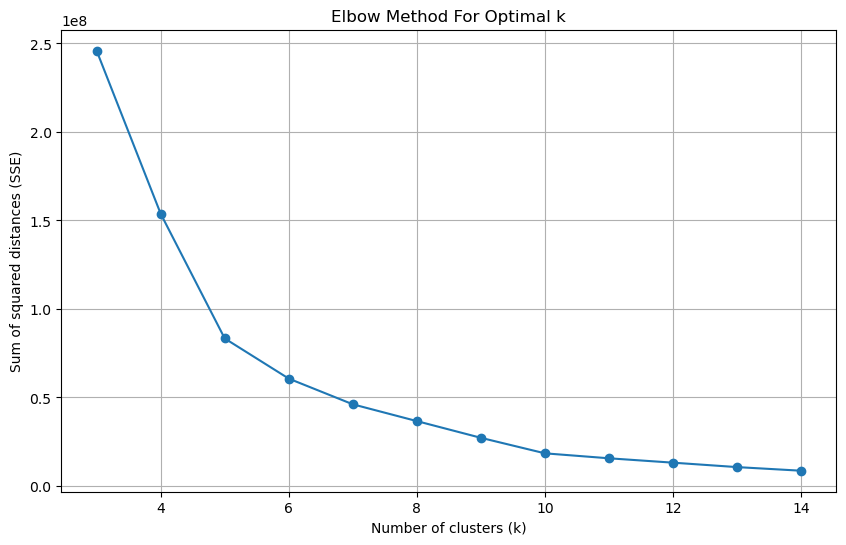

In [36]:
# k-mean로 관중 수 범위 나눌 k 값 찾기

# 데이터 전처리: 타깃 컬럼과 피쳐 컬럼 분리
features = kiwoom_2022_2023_copy.drop(['관중 수'], axis=1)
target = kiwoom_2022_2023_copy[['관중 수']]

attendance_shape = np.array(target).reshape(-1,1)

# 특성 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(attendance_shape)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 15)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(attendance_shape)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [37]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(5):
    cluster_data = \
        kiwoom_2022_2023_copy[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

{0: (774, 3238),
 1: (13301, 16000),
 2: (6064, 8817),
 3: (3564, 5952),
 4: (9442, 12545)}

In [38]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023_copy['관중수 분류'] = \
    pd.cut(kiwoom_2022_2023_copy['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
        np.mean(cluster_ranges[1]).round(0),
        np.mean(cluster_ranges[3]).round(0),
        np.mean(cluster_ranges[4]).round(0),
        np.mean(cluster_ranges[2]).round(0),
        np.mean(cluster_ranges[0]).round(0)
        ], 
    right=False)

In [39]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024_copy['관중수 분류'] = \
    pd.cut(kiwoom_2024_copy['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
        np.mean(cluster_ranges[1]).round(0),
        np.mean(cluster_ranges[3]).round(0),
        np.mean(cluster_ranges[4]).round(0),
        np.mean(cluster_ranges[2]).round(0),
        np.mean(cluster_ranges[0]).round(0)
        ], 
    right=False)

In [40]:
kiwoom_2022_2023_copy

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,5,6,7,8,9,10,14:00,17:00,18:30,관중수 분류
0,8257,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,10994.0
1,6115,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,10994.0
2,2298,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,14650.0
3,2304,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,14650.0
4,2055,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,14650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5178,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4758.0
139,7082,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,10994.0
140,14472,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2006.0
141,13301,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,2006.0


In [41]:
kiwoom_2022_2023_copy['관중수 분류'] = kiwoom_2022_2023_copy['관중수 분류'].astype(int)
kiwoom_2022_2023_copy

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,5,6,7,8,9,10,14:00,17:00,18:30,관중수 분류
0,8257,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,10994
1,6115,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,10994
2,2298,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,14650
3,2304,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,14650
4,2055,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,14650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5178,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4758
139,7082,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,10994
140,14472,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2006
141,13301,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,2006


In [42]:
kiwoom_2024_copy['관중수 분류'] = kiwoom_2024_copy['관중수 분류'].astype(int)
kiwoom_2024_copy

,관중 수,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,...,6,7,8,9,10,14:00,17:00,18:30,0,관중수 분류
0,8465,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,10994
1,13462,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2006
2,11822,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,7440
3,16000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2006
4,16000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2006
5,16000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2006
6,8838,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,10994
7,14197,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2006
8,12333,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,7440
9,2877,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14650


In [43]:
kiwoom_2022_2023_copy.drop(['관중 수'], axis=1).corr()

,KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,1,...,5,6,7,8,9,10,14:00,17:00,18:30,관중수 분류
KIA,1.000000,-0.125742,-0.117188,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,-0.058072,...,0.005257,-0.035980,0.133878,-0.042708,-0.112774,-0.042708,-0.004658,-0.049109,3.608439e-02,0.037563
KT,-0.125742,1.000000,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,-0.134921,-0.062311,...,0.082750,0.024405,0.016807,-0.125742,0.242521,-0.125742,-0.079388,0.075254,2.391434e-02,0.098631
LG,-0.117188,-0.125742,1.000000,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,0.218736,...,-0.088718,-0.035980,0.133878,0.031771,-0.035980,-0.042708,-0.004658,-0.049109,3.608439e-02,-0.041952
NC,-0.117187,-0.125742,-0.117187,1.000000,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,-0.058072,...,-0.088718,0.117607,-0.077664,0.106250,-0.112774,-0.042708,-0.004658,0.023289,-1.082532e-02,-0.076054
SSG,-0.117187,-0.125742,-0.117187,-0.117187,1.000000,-0.125742,-0.125742,-0.117187,-0.125742,-0.058072,...,0.193207,-0.035980,-0.077664,0.106250,-0.112774,-0.042708,0.097828,0.168084,-1.984642e-01,-0.022699
두산,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,1.000000,-0.134921,-0.125742,-0.134921,-0.062311,...,0.171722,0.024405,0.116947,0.015286,-0.121006,0.085800,-0.176419,-0.061833,2.015637e-01,0.121728
롯데,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,-0.134921,1.000000,-0.125742,-0.134921,-0.062311,...,-0.095194,-0.048301,-0.083333,0.085800,0.024405,0.156314,0.066157,-0.061833,-2.049800e-02,-0.127226
삼성,-0.117188,-0.125742,-0.117188,-0.117188,-0.117187,-0.125742,-0.125742,1.000000,-0.125742,-0.058072,...,-0.088718,0.117607,-0.077664,-0.117187,0.194401,-0.117187,-0.055902,0.023289,3.608439e-02,-0.036399
한화,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,1.000000,0.199760,...,-0.095194,-0.121006,-0.083333,-0.055228,0.024405,0.156314,0.163187,-0.061833,-1.093227e-01,0.038980
1,-0.058072,-0.062311,0.218736,-0.058072,-0.058072,-0.062311,-0.062311,-0.058072,0.199760,1.000000,...,-0.043963,-0.055885,-0.038486,-0.058072,-0.055885,-0.058072,0.086568,-0.060212,-4.023313e-02,-0.167566


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
# 데이터 준비 (x는 피쳐, y는 타겟)
x = kiwoom_2022_2023_copy.drop(['관중 수','관중수 분류'], axis=1)
y = kiwoom_2022_2023_copy[['관중수 분류']]

# 실제 데이터 준비
test_x = kiwoom_2024_copy.drop(['관중 수','관중수 분류'], axis=1)
test_y = kiwoom_2024_copy[['관중수 분류']]

In [59]:
# 손글씨
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [68]:
# 의사결정 나무
rf = RandomForestClassifier()
rf = rf.fit(X_train, Y_train)
print(f"rf : {rf.score(X_test, Y_test)}")

# 의사결정 나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)
print(f"dTree : {dtree.score(X_test, Y_test)}")

# KNN
knn = KNeighborsClassifier().fit(X_train, Y_train)
print(f"kNN : {knn.score(X_test, Y_test)}")

# SVM
svm = SVC(probability=True).fit(X_train, Y_train)
print(f"svm : {svm.score(X_test, Y_test)}")

rf : 0.5172413793103449
dTree : 0.5517241379310345
kNN : 0.3793103448275862
svm : 0.5517241379310345


In [69]:
# 기본값으로 모델 구성
clf = RandomForestClassifier(random_state=42)
scores = cross_validate(clf, x, y, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9196186117467582 0.3975369458128079


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

In [71]:
# 기본값으로 모델 구성
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, x, y, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.9178642257818458 0.2935960591133005


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측하기
predicted_prices = model.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, predicted_prices)
print('MSE:', mse)

# 루트 평균 제곱 오차 계산
rmse = mean_squared_error(y_test, predicted_prices)**0.5
print('RMSE:', rmse)

# 평균 절대 오차 계산
mae = mean_absolute_error(y_test, predicted_prices)
print('MAE:', mae)

# 전체 데이터 범위 계산
data_range = max(y) - min(y)

# 백분율 계산 (MAE 기준)
accuracy_percentage_mae = (1 - (mae / data_range)) * 100
print('정확도 (백분율, MAE 기준):', accuracy_percentage_mae)

# 백분율 계산 (RMSE 기준)
accuracy_percentage_rmse = (1 - (rmse / data_range)) * 100
print('정확도 (백분율, RMSE 기준):', accuracy_percentage_rmse)

In [ ]:
# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

# 예측하기
predicted_prices = model.predict(test_x)

# 평균 제곱 오차 계산
mse = mean_squared_error(test_y, predicted_prices)
print('MSE:', mse)

# 루트 평균 제곱 오차 계산
rmse = mean_squared_error(test_y, predicted_prices)**0.5
print('RMSE:', rmse)

# 평균 절대 오차 계산
mae = mean_absolute_error(test_y, predicted_prices)
print('MAE:', mae)

# 전체 데이터 범위 계산
data_range = max(test_y) - min(test_y)

# 백분율 계산 (MAE 기준)
accuracy_percentage_mae = (1 - (mae / data_range)) * 100
print('정확도 (백분율, MAE 기준):', accuracy_percentage_mae)

# 백분율 계산 (RMSE 기준)
accuracy_percentage_rmse = (1 - (rmse / data_range)) * 100
print('정확도 (백분율, RMSE 기준):', accuracy_percentage_rmse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
# 랜덤 포레스트 회귀 모델 학습
model = DecisionTreeRegressor()
model.fit(x, y)

# 예측하기
predicted_prices = model.predict(test_x)

# 평균 제곱 오차 계산
mse = mean_squared_error(test_y, predicted_prices)
print('MSE:', mse)

# 루트 평균 제곱 오차 계산
rmse = mean_squared_error(test_y, predicted_prices)**0.5
print('RMSE:', rmse)

# 평균 절대 오차 계산
mae = mean_absolute_error(test_y, predicted_prices)
print('MAE:', mae)

# 전체 데이터 범위 계산
data_range = max(test_y) - min(test_y)

# 백분율 계산 (MAE 기준)
accuracy_percentage_mae = (1 - (mae / data_range)) * 100
print('정확도 (백분율, MAE 기준):', accuracy_percentage_mae)

# 백분율 계산 (RMSE 기준)
accuracy_percentage_rmse = (1 - (rmse / data_range)) * 100
print('정확도 (백분율, RMSE 기준):', accuracy_percentage_rmse)

In [ ]:
# 랜덤 포레스트 회귀 모델 학습
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x, y)

# 예측하기
predicted_prices = model.predict(test_x)

# 평균 제곱 오차 계산
mse = mean_squared_error(test_y, predicted_prices)
print('MSE:', mse)

# 루트 평균 제곱 오차 계산
rmse = mean_squared_error(test_y, predicted_prices)**0.5
print('RMSE:', rmse)

# 평균 절대 오차 계산
mae = mean_absolute_error(test_y, predicted_prices)
print('MAE:', mae)

# 전체 데이터 범위 계산
data_range = max(test_y) - min(test_y)

# 백분율 계산 (MAE 기준)
accuracy_percentage_mae = (1 - (mae / data_range)) * 100
print('정확도 (백분율, MAE 기준):', accuracy_percentage_mae)

# 백분율 계산 (RMSE 기준)
accuracy_percentage_rmse = (1 - (rmse / data_range)) * 100
print('정확도 (백분율, RMSE 기준):', accuracy_percentage_rmse)

In [ ]:
# 랜덤 포레스트 회귀 모델 학습
model = SVR(kernel='linear')
model.fit(x, y)

# 예측하기
predicted_prices = model.predict(test_x)

# 평균 제곱 오차 계산
mse = mean_squared_error(test_y, predicted_prices)
print('MSE:', mse)

# 루트 평균 제곱 오차 계산
rmse = mean_squared_error(test_y, predicted_prices)**0.5
print('RMSE:', rmse)

# 평균 절대 오차 계산
mae = mean_absolute_error(test_y, predicted_prices)
print('MAE:', mae)

# 전체 데이터 범위 계산
data_range = max(test_y) - min(test_y)

# 백분율 계산 (MAE 기준)
accuracy_percentage_mae = (1 - (mae / data_range)) * 100
print('정확도 (백분율, MAE 기준):', accuracy_percentage_mae)

# 백분율 계산 (RMSE 기준)
accuracy_percentage_rmse = (1 - (rmse / data_range)) * 100
print('정확도 (백분율, RMSE 기준):', accuracy_percentage_rmse)

In [ ]:
# 의사결정 나무
dtree = DecisionTreeRegressor()
dtree = dtree.fit(X_train, y_train)
print(f"dTree : {dtree.score(X_test, y_test)*100}")

# KNN
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(f"kNN : {knn.score(X_test, y_test)*100}")

# SVM
svm = SVR(kernel='linear').fit(X_train, y_train)
print(f"svm : {svm.score(X_test, y_test)*100}")

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='hard'
).fit(X_train, Y_train)

voting_clf.score(X_test, Y_test)*100

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='soft'
).fit(X_train, Y_train)

voting_clf.score(X_test, Y_test)*100